In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
dataset.shape

(200, 5)

In [11]:
x = dataset.iloc[:,[3,4]].values

In [12]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

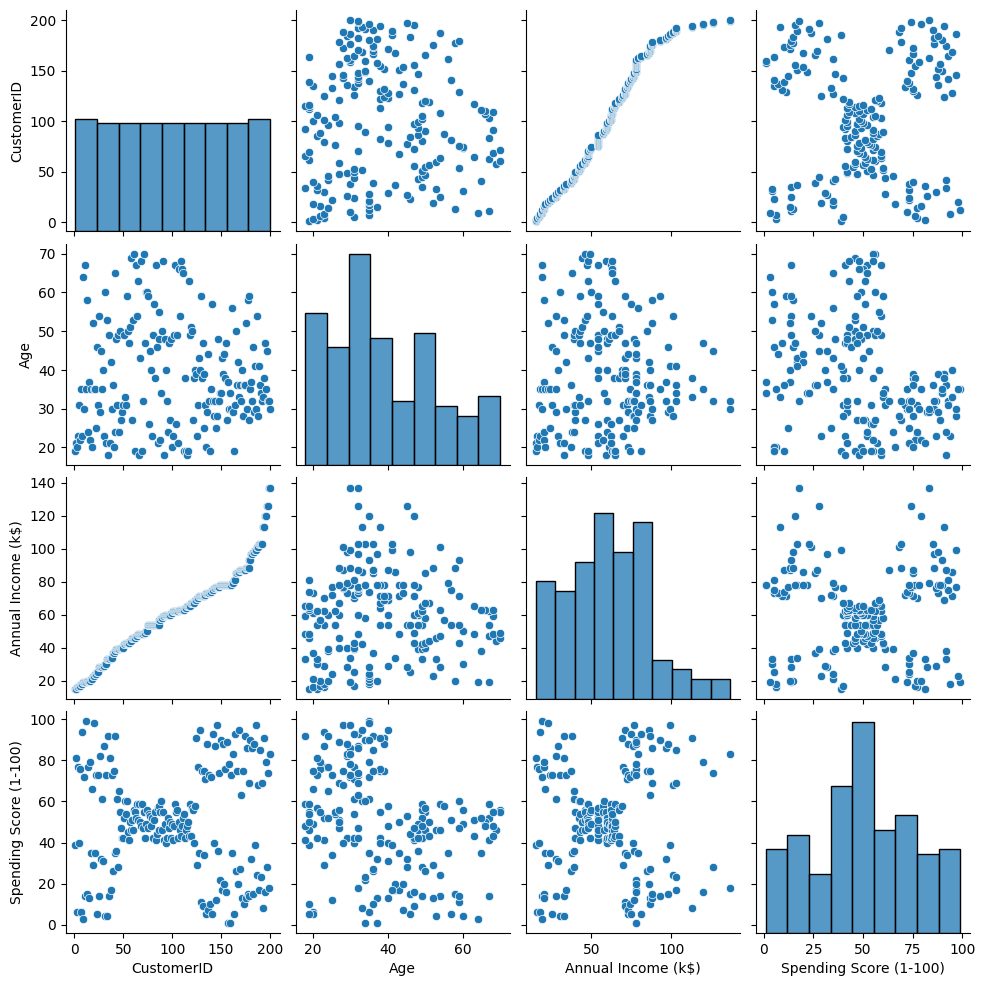

In [7]:
sns.pairplot(data=dataset)
plt.show()

In [15]:
wcss =[]

for i in range (1,11):
    Km= KMeans(n_clusters=i,init="k-means++", random_state=42)
    Km.fit(x)

    wcss.append(Km.inertia_)

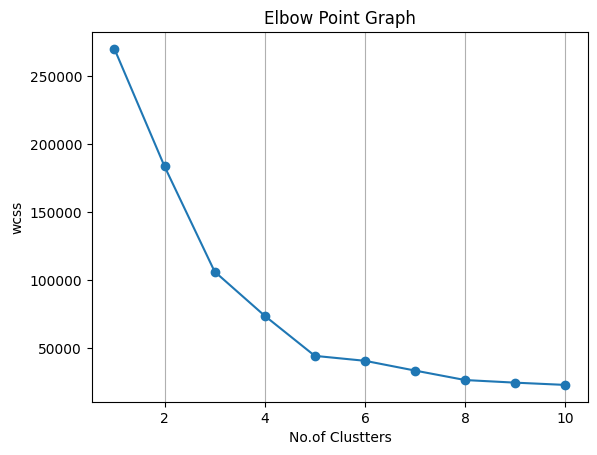

In [20]:
plt.plot(range (1,11), wcss , marker="o")
plt.title('Elbow Point Graph')
plt.xlabel('No.of Clustters')
plt.ylabel('wcss')
plt.grid(axis="x")
plt.show()

In [24]:
km= KMeans(n_clusters=3)
dataset["Predict"]=km.fit_predict(x)


In [25]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predict
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


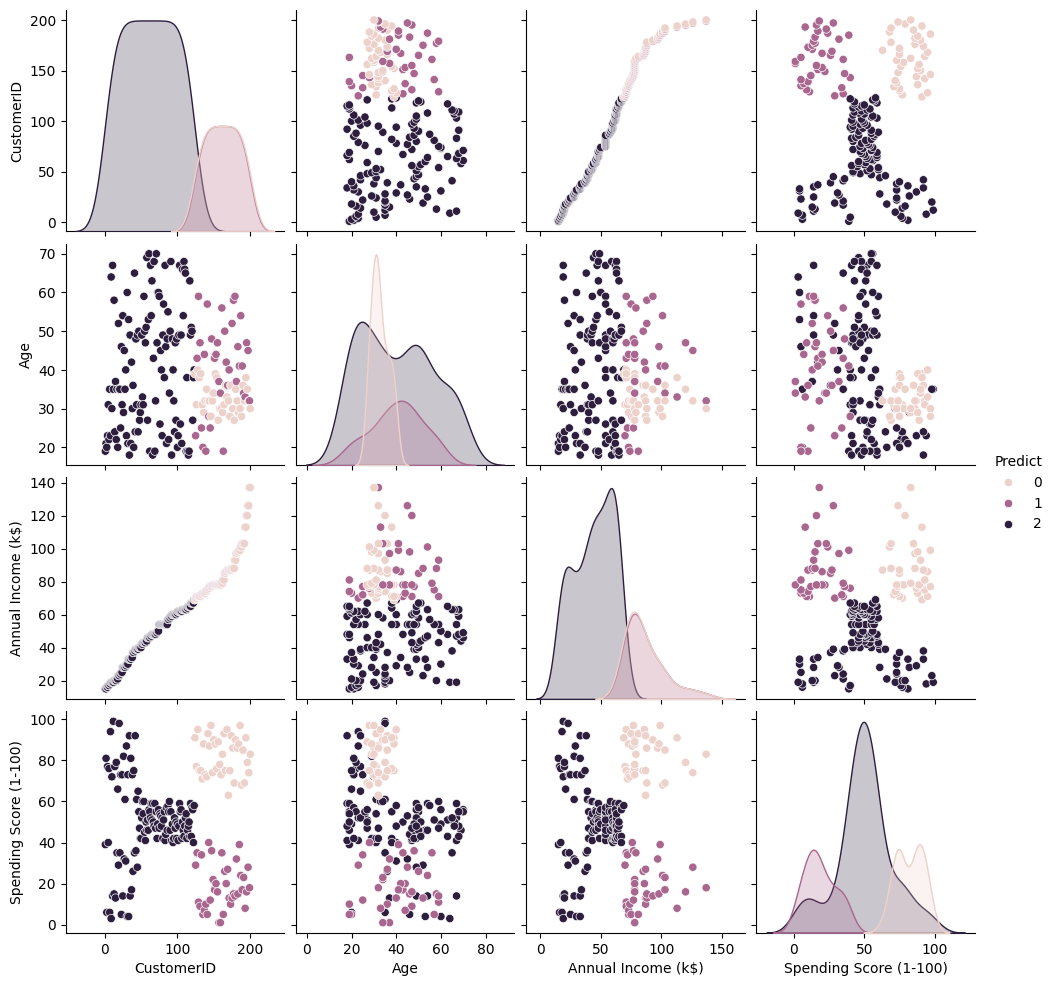

In [26]:
sns.pairplot(data=dataset, hue="Predict")
plt.show()